The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [61]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
# Load the data from csv file
df = pd.read_csv('nobel.csv')

In [62]:
# Print top rows of df
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [63]:
# Show shape of df
df.shape

(1000, 18)

In [64]:
# Show info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [65]:
# Set theme for visualizations
sns.set_theme(style = 'darkgrid')

# What is the most commonly awarded gender?

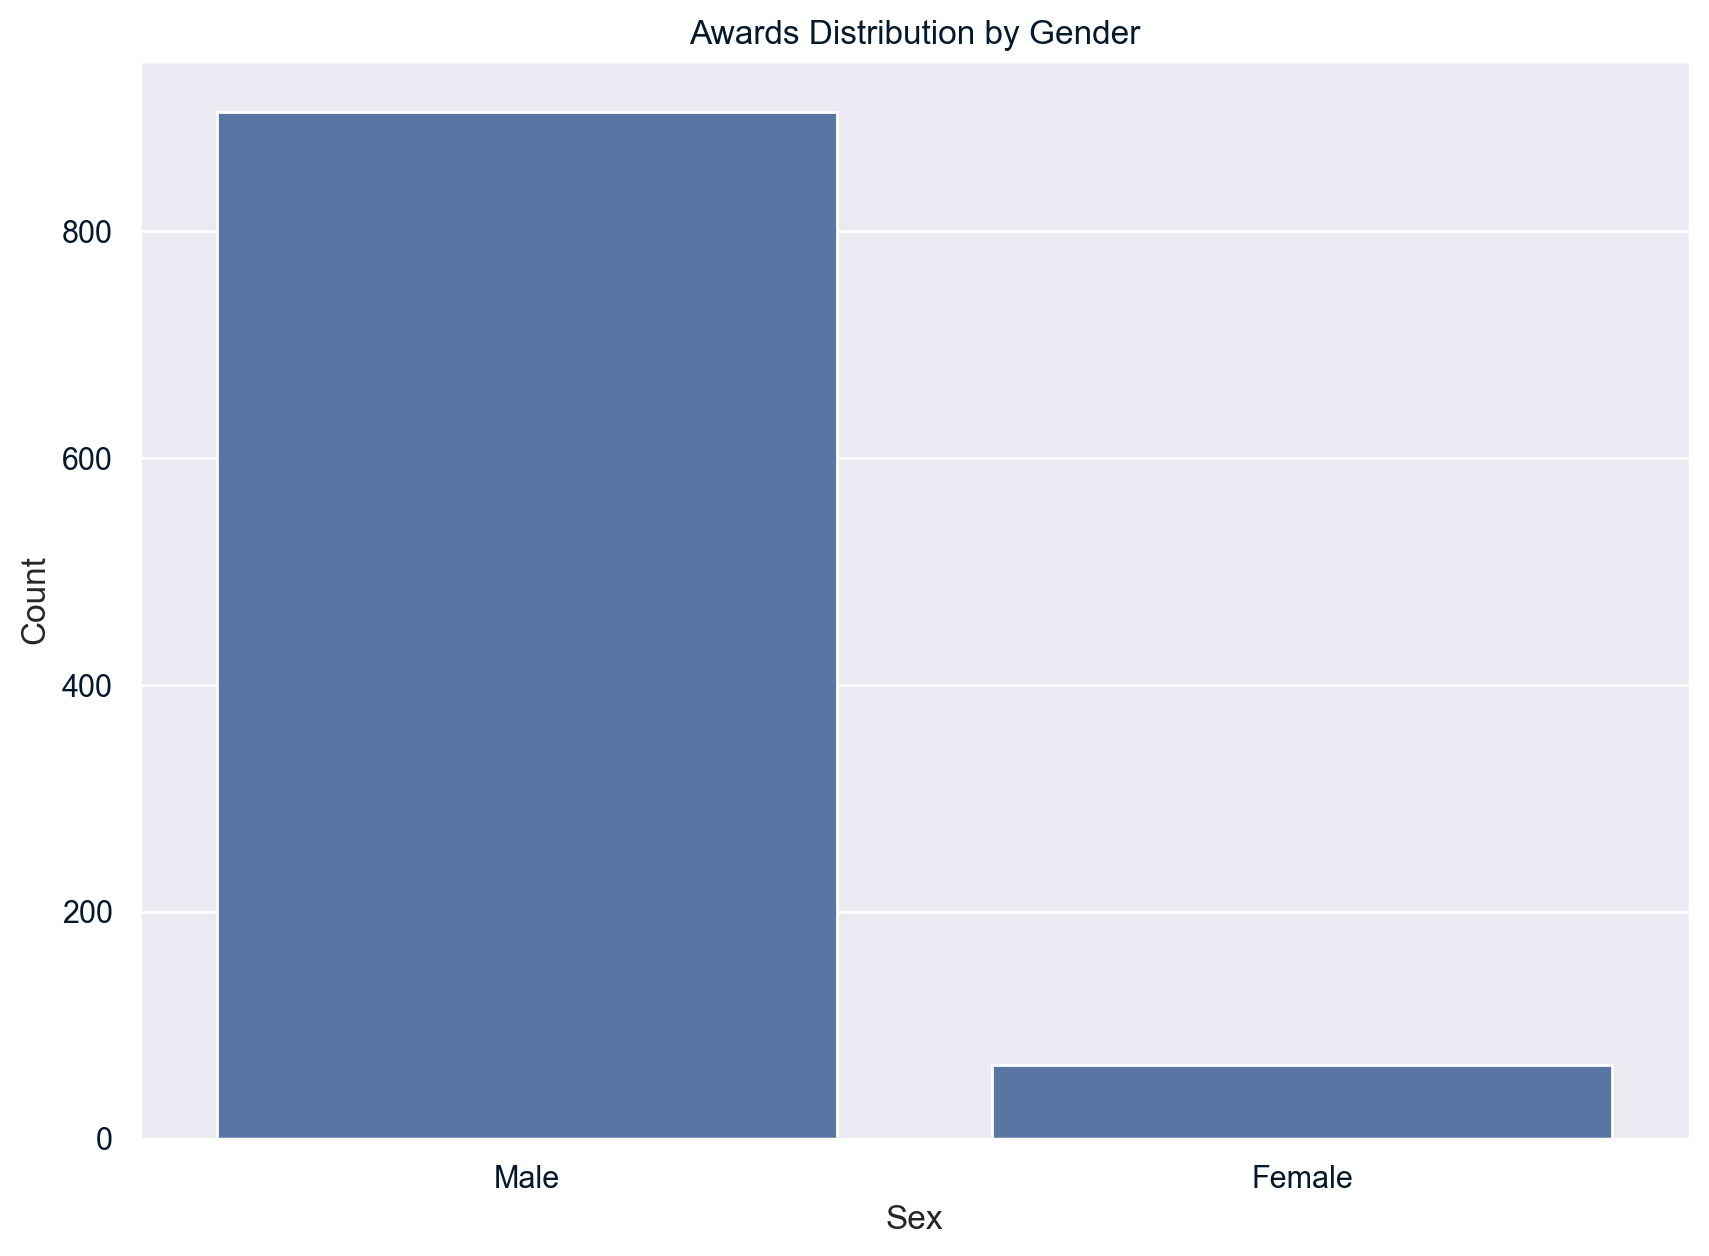

Number of awarded men: 905
Number of awarded women: 65


In [66]:
# Set the figsize
plt.figure(figsize = (10, 7))

# Plot a bar chart
sns.countplot(
    data = df,
    x = 'sex'
)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Awards Distribution by Gender')

# Show chart
plt.show()

# Display number of men awarded
male_awarded = df['sex'].value_counts()['Male']
print('Number of awarded men: ' + str(male_awarded))

# Display number of women awarded
female_awarded = df['sex'].value_counts()['Female']
print('Number of awarded women: ' + str(female_awarded))

# Provide answer
top_gender = 'Male'

# What is the most commonly awarded birth country?

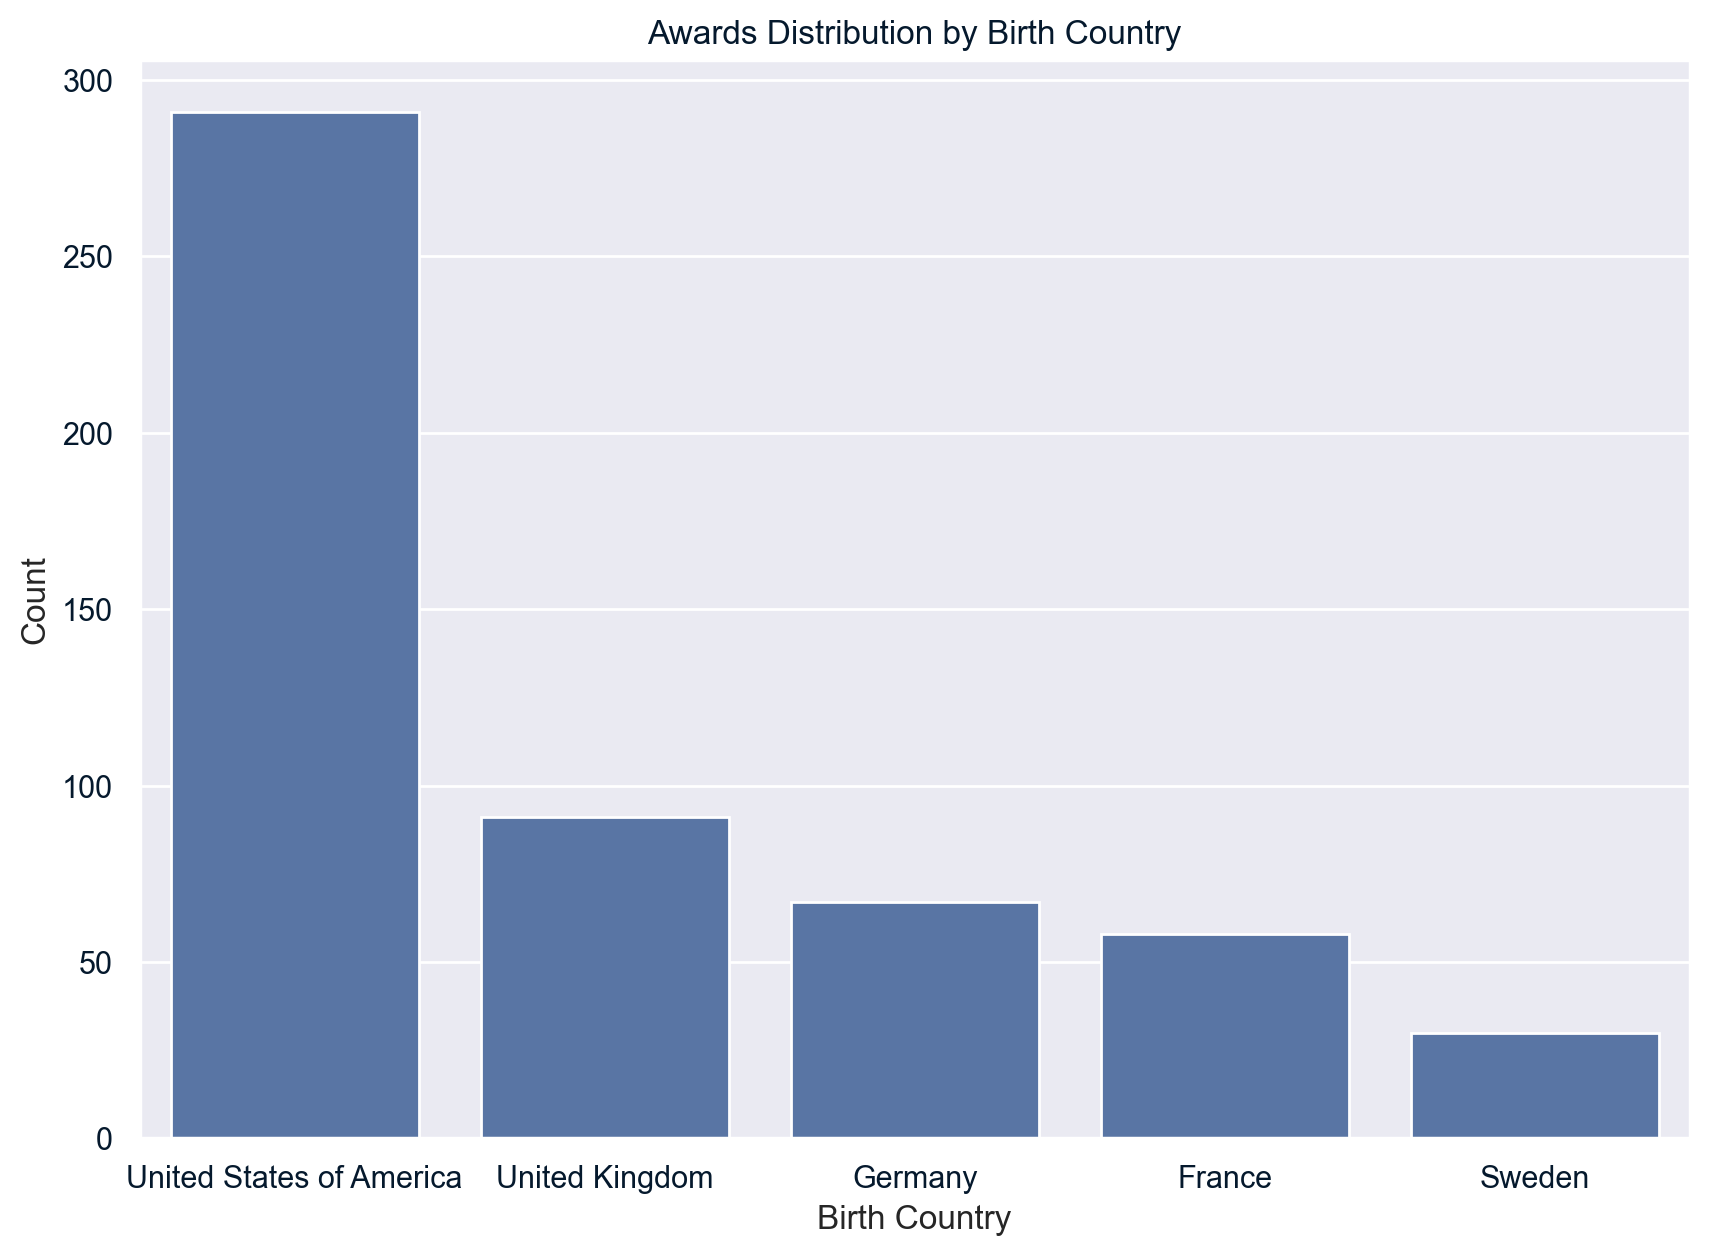

Number of awards for top birth_country: 291


In [67]:
# Identify top 5 birth_country
top_birth_country = df['birth_country'].value_counts().head(5).index

# Filter df to show top 5 birth_country 
df_top_birth_country = df[df['birth_country'].isin(top_birth_country)]

# Set the figsize
plt.figure(figsize=(10, 7))

# Categories order
birth_country_order = ['United States of America', 'United Kingdom', 'Germany', 'France', 'Sweden']

# Plot a bar chart
sns.countplot(
    data = df_top_birth_country,
    x = 'birth_country',
    order = birth_country_order
)

# Name chart and axis
plt.xlabel('Birth Country')
plt.ylabel('Count')
plt.title('Awards Distribution by Birth Country')

# Show chart
plt.show()

# Display number of awards for top birth_country
birth_country_awarded = df['birth_country'].value_counts()['United States of America']
print('Number of awards for top birth_country: ' + str(birth_country_awarded))

# Provide Answer
top_country = 'United States of America'

# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

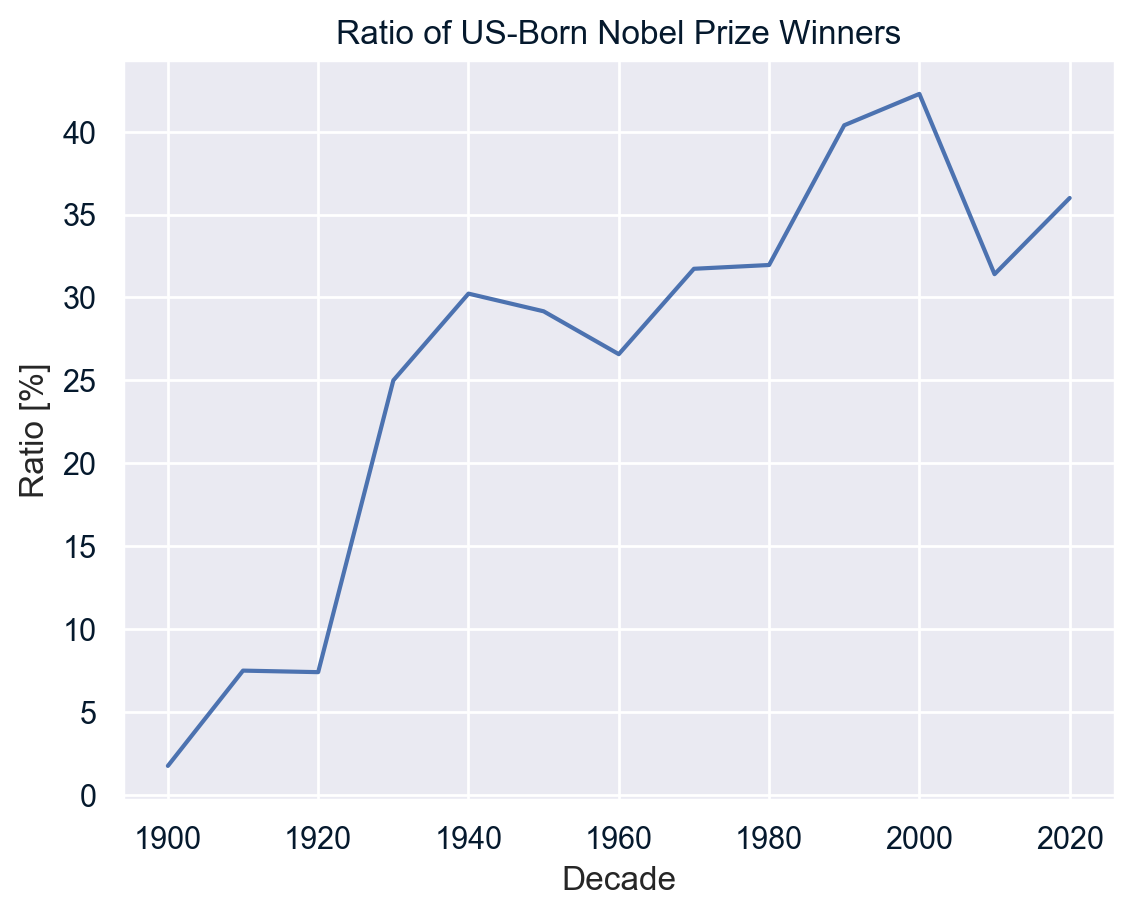

The highest ratio of US-born Nobel Prize winners was in decade: 2000


In [68]:
# Process the data
df['decade'] = (df['year'] // 10) * 10
df['us_born'] = df['birth_country'].apply(lambda x: x == 'United States of America')

# Group by decade
decade_stats = df.groupby('decade').agg(
    total_winners=('year', 'count'), us_born_winners=('us_born', 'sum')
)

# Calculate the ratio
decade_stats['ratio'] = decade_stats['us_born_winners'] / decade_stats['total_winners'] * 100

# Plot a line chart
sns.lineplot(
    data=decade_stats,
    x='decade',
    y='ratio'
)

# Name chart and axis
plt.xlabel('Decade')
plt.ylabel('Ratio [%]')
plt.title('Ratio of US-Born Nobel Prize Winners')

# Show chart
plt.show()

# Find the decade with the highest ratio
top_decade_usa = decade_stats['ratio'].idxmax()
print('The highest ratio of US-born Nobel Prize winners was in decade: ' + str(top_decade_usa))

# Provide Answer
max_decade_usa = 2000

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

The highest ratio of female winners is category Literature in decade 2020.


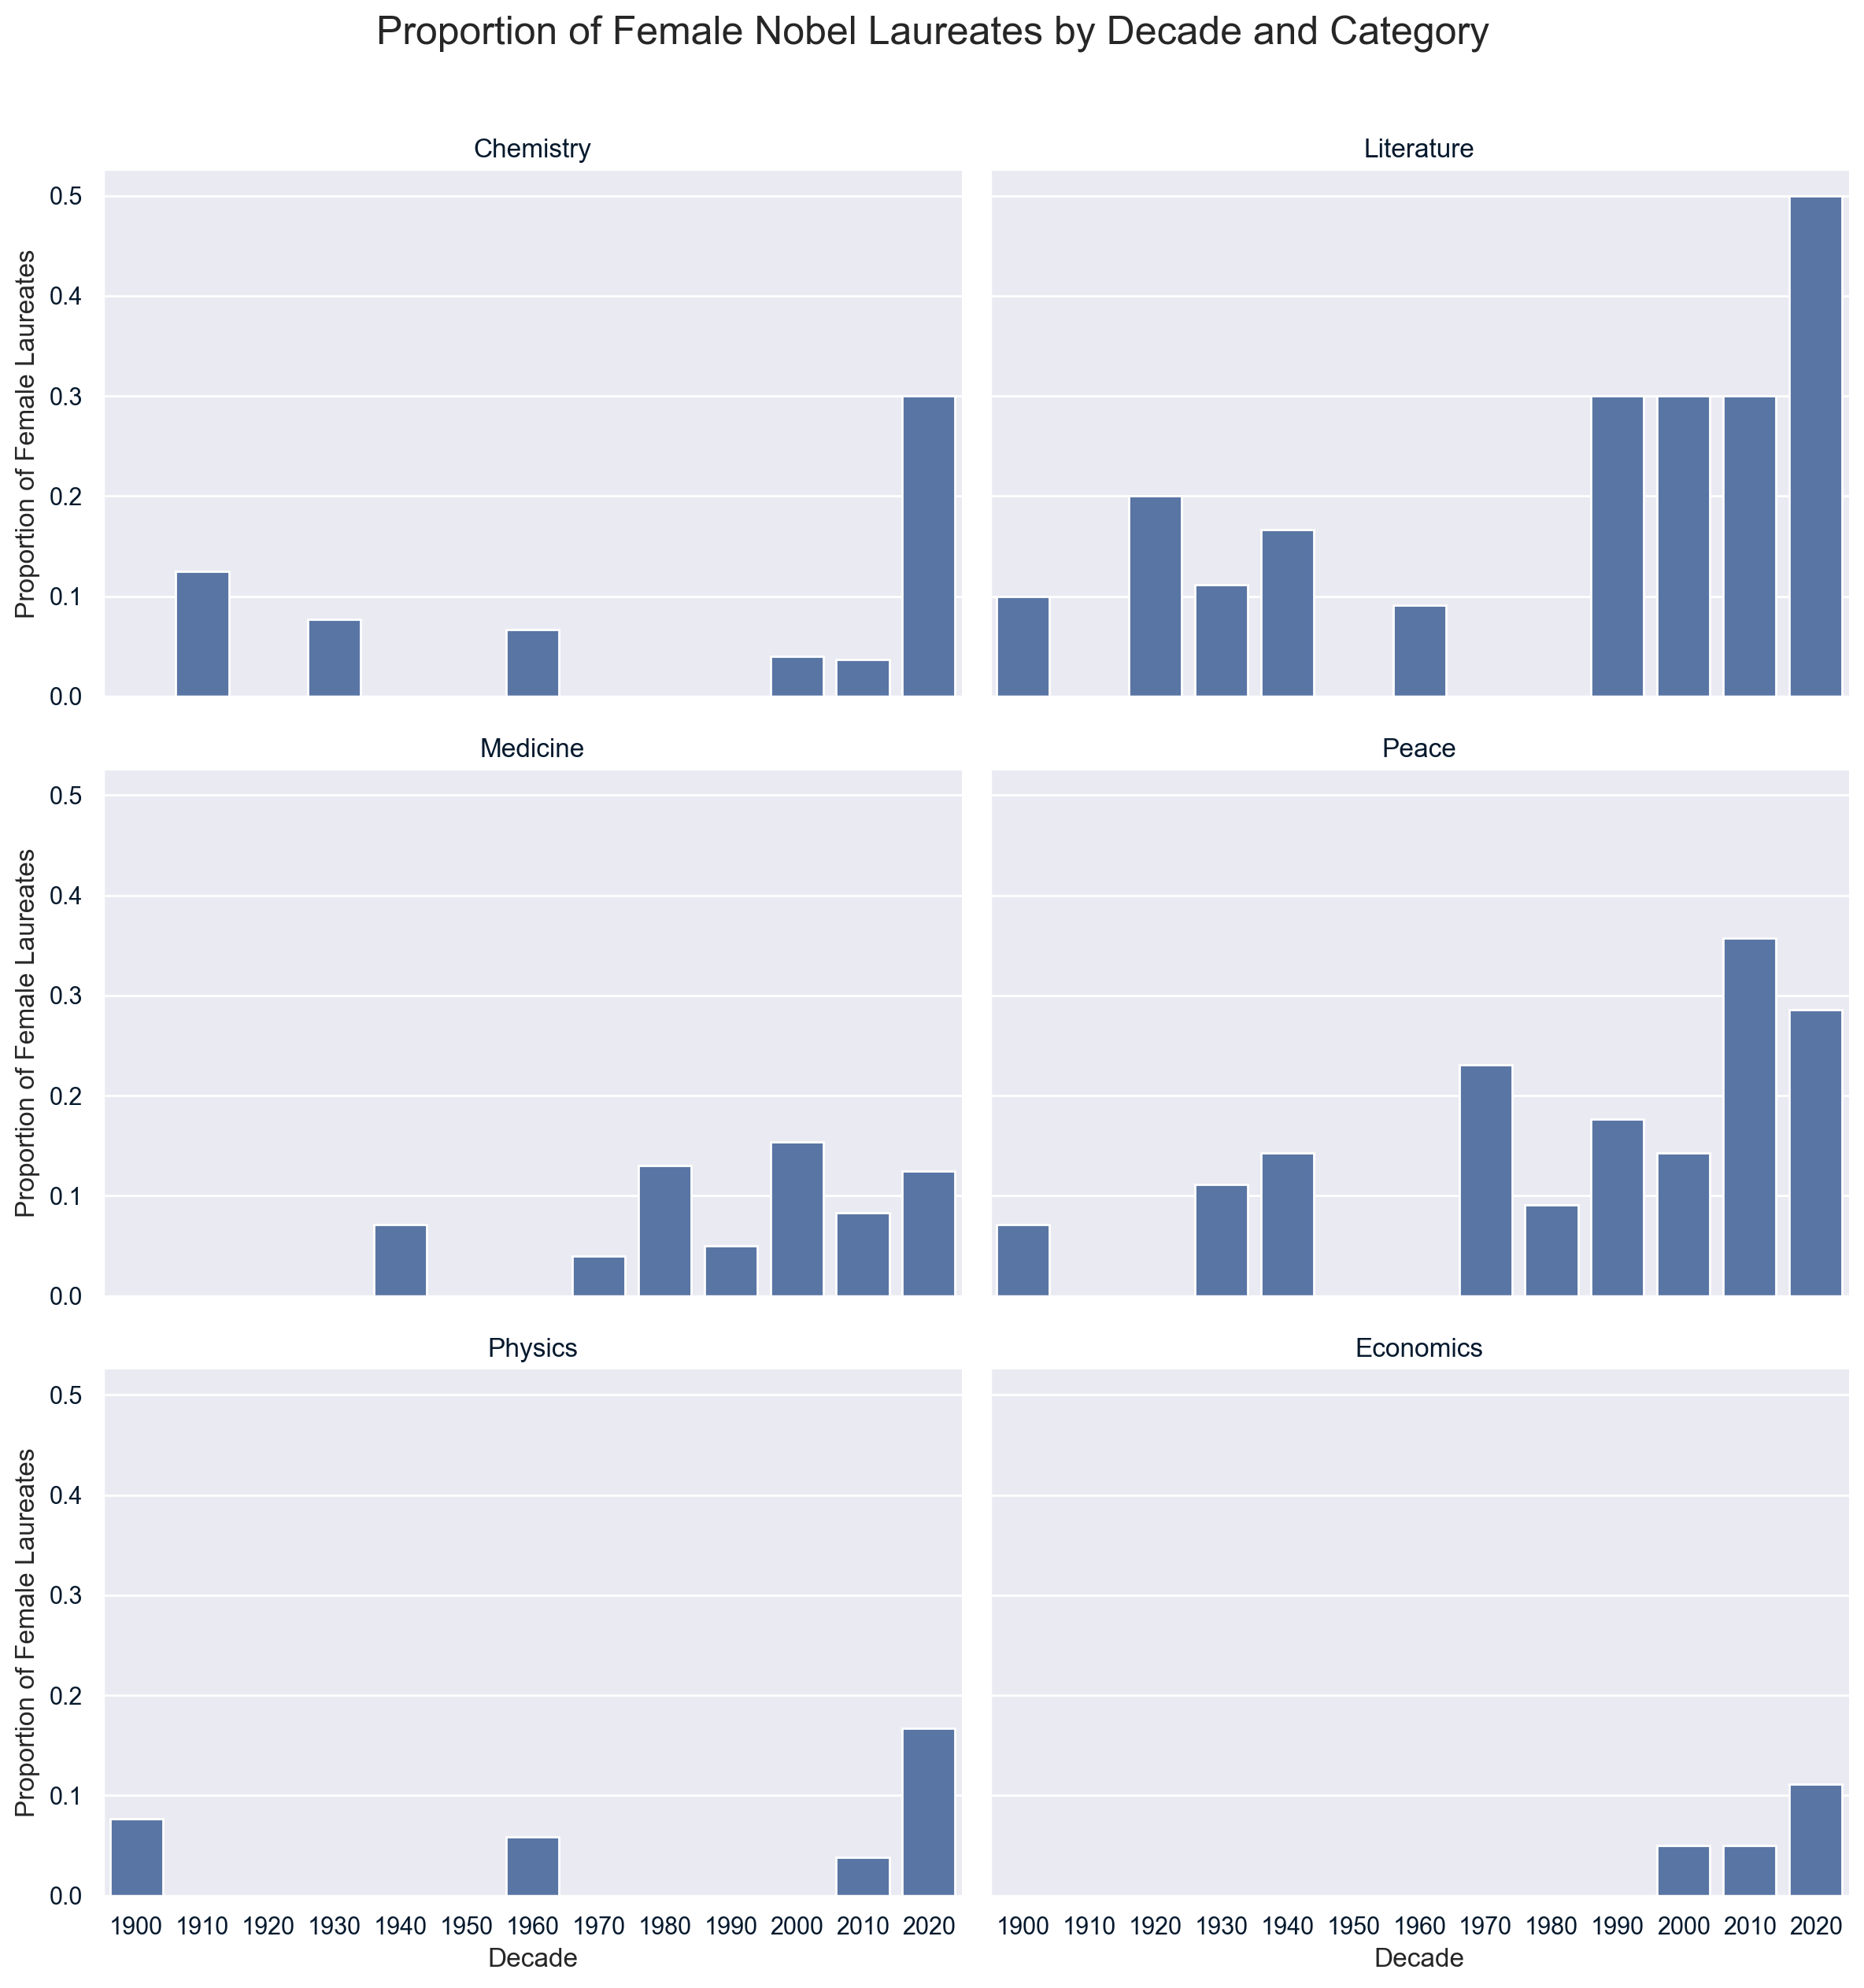

{2020: 'Literature'}

In [69]:
# Create a new column indicating whether the laureate is female
df['is_female'] = df['sex'].apply(lambda x: x == 'Female')

# Group by decade and category, then calculate the proportion of female laureates
category_stats = df.groupby(['decade', 'category']).agg(
    total_winners=('year', 'count'), female_winners=('is_female', 'sum')
)

# Calculate the proportion of female laureates in each decade-category combination
category_stats['female_ratio'] = category_stats['female_winners'] / category_stats['total_winners']

# Find the decade-category combination with the highest proportion of female laureates
max_female_entry = category_stats['female_ratio'].idxmax()
max_female_dict = {max_female_entry[0]: max_female_entry[1]}
print('The highest ratio of female winners is category ' + str(max_female_entry[1]) + ' in decade ' + str(max_female_entry[0]) + '.')

# Reset the index for easier plotting
category_stats = category_stats.reset_index()

# Create a FacetGrid with seaborn
g = sns.FacetGrid(category_stats, col='category', col_wrap=2, sharey=True, height=4, aspect=1.5)
g.map(sns.barplot, 'decade', 'female_ratio', order=sorted(category_stats['decade'].unique()))

# Add titles and labels
g.set_axis_labels('Decade', 'Proportion of Female Laureates')
g.set_titles('{col_name}')
plt.suptitle('Proportion of Female Nobel Laureates by Decade and Category', fontsize=18, y=1.05)

# Show the plot
plt.show()

# Provide Answer
max_female_dict

# Who was the first woman to receive a Nobel Prize, and in what category?

In [70]:
# Find the first female Nobel Prize winner
first_woman = df[df['sex'] == 'Female'].sort_values(by='year').iloc[0]

# Extract name and category
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']
print('The first woman to receive a Nobel Prize was ' + str(first_woman_name) + ' in the ' + str(first_woman_category) + ' category.')

# Provide Answer
first_woman_name, first_woman_category

The first woman to receive a Nobel Prize was Marie Curie, née Sklodowska in the Physics category.


('Marie Curie, née Sklodowska', 'Physics')

# Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [71]:
# Count occurrences of each laureate
repeat_winners = df['full_name'].value_counts()

# Filter for individuals who have won more than once
repeat_list = repeat_winners[repeat_winners > 1].index.tolist()

# Provide Answer
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']